# Introduction
This goal of this project was to analyze the data about biodiversity from the National Parks Service, particularly around the various species observed in the different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

What is the distribution of conservation status for animals?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?

Which species were spotted the most at each park?

##### Data sources:
Both Observations.csv and Species_info.csv was provided by Codecademy.com.

## Project Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

## Data
This project was completed with two data sets that were supplied. One has information about each species and the other has observations of species with park locations.

# Import Python Modules
First import the python modules that will be used for this project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

# Loading and Initial Data Analysis
The two datasets are loaded into dataframes using pandas in order to explore and visualise the data with python. 'Observations.csv' and 'Species_info.csv' are read in as dataframes called 'obs' and 'spec_info' respectively. The dataframes are then looked at using '.tail()' to get some initial analysis.

In [2]:
obs = pd.read_csv('observations.csv')
display(obs.tail())

,scientific_name,park_name,observations
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164


The above dataframe shows the contents of the 'observations.csv' file. The dataset has 3 columns which contain:

- scientific_name - The scientific name of each species.
- park_name - The name of the park the species was observed in.
- observations - The number of observations of that species in that park in the last seven days.

This dataset has also has 23,296 rows of data.

In [3]:
spec_info = pd.read_csv('species_info.csv')
display(spec_info.tail())

,category,scientific_name,common_names,conservation_status
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN


The above dataframe shows the contents of the 'species_info.csv' file. The dataset has 4 columns which contain:

- category - The category the species belongs to.
- scientific_name - The scientific name of each species.
- common_names - Commonly used names for that species.
- conservation_status - The conservation status of the species.

This dataset has also has 5,823 rows of data.

Next some further exploration of the data was conducted.

In [5]:
display(obs.describe())
display(spec_info.describe())

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The summary statistics of the obervations data says that the average number of sightings for a species in one of the parks in the last seven days was 142. The species sighted the least was seen 9 times while the one seen the most was spotted 321 times.

In [6]:
print(spec_info.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The species in the spec_info table have been split into seven catogries which are shown above.

In [7]:
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There are four national parks included in the data which are shown above.

# Question 1
What is the distribution of conservation_status for animals?

The first step was to take the species_info dataset and remove the rows containing plants as this question is only asking about animals.

In [8]:
# Removing plants from the dataset
spec_info_animals = spec_info[(spec_info.category != 'Vascular Plant')&(spec_info.category != 'Nonvascular Plant')]

Next the conservation_status data was displayed in a barchart for all animals and in seperate charts for each animal.

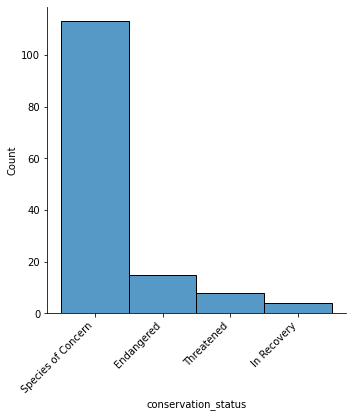

<Figure size 432x288 with 0 Axes>

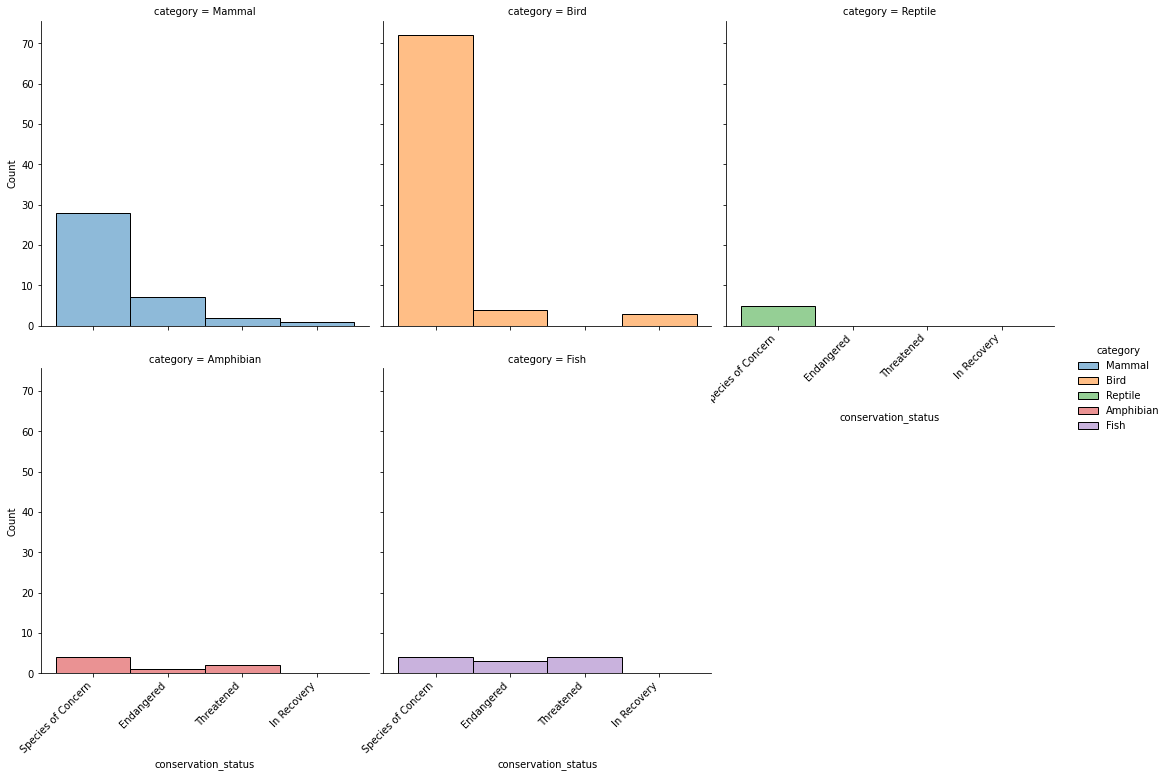

<Figure size 432x288 with 0 Axes>

In [9]:
#Conservation status for all animals
chart1 = sns.displot(data=spec_info_animals, x="conservation_status")
chart1.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
plt.clf()
#Conservation status split by animal
chart2 = sns.displot(data=spec_info_animals, x="conservation_status", hue='category', col='category', col_wrap=3)
chart2.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
plt.clf()

These charts show that Mammals and Birds have a high number of species of concern compared to the other categories. Reptiles do not have any species in the other categories whereas the others all have species in a more serious conservation status. The overwhelming number of species come under species of concern as evidenced by the first chart.

These data visualasiations do not show the data with NaN values however. The NaN values represent the animals that do not fall under a conservation status so they have been marked below as safe.

In [10]:
# Counting the NaN values with a conservation status of 'Safe'
spec_info_safe = spec_info.fillna('Safe')
display(spec_info_safe.head())


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe
1,Mammal,Bos bison,"American Bison, Bison",Safe
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe


The plants are then taken out of the data before being visualised again to see the safe animals represented.

In [11]:
#Removing plants from the dataset
spec_info_safe_animals = spec_info_safe[(spec_info.category != 'Vascular Plant')&(spec_info.category != 'Nonvascular Plant')]
display(spec_info_safe_animals)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe
1,Mammal,Bos bison,"American Bison, Bison",Safe
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe
...,...,...,...,...
4610,Fish,Mylopharodon conocephalus,Hardhead,Safe
4611,Fish,Ptychocheilus grandis,Sacramento Pikeminnow,Safe
4612,Fish,Oncorhynchus clarkii henshawi,Lahontan Cutthroat Trout,Threatened
4613,Fish,Oncorhynchus mykiss aguabonita,California Golden Trout,Safe


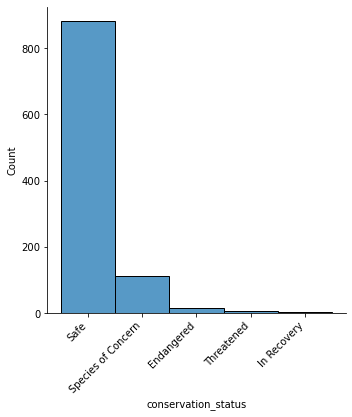

<Figure size 432x288 with 0 Axes>

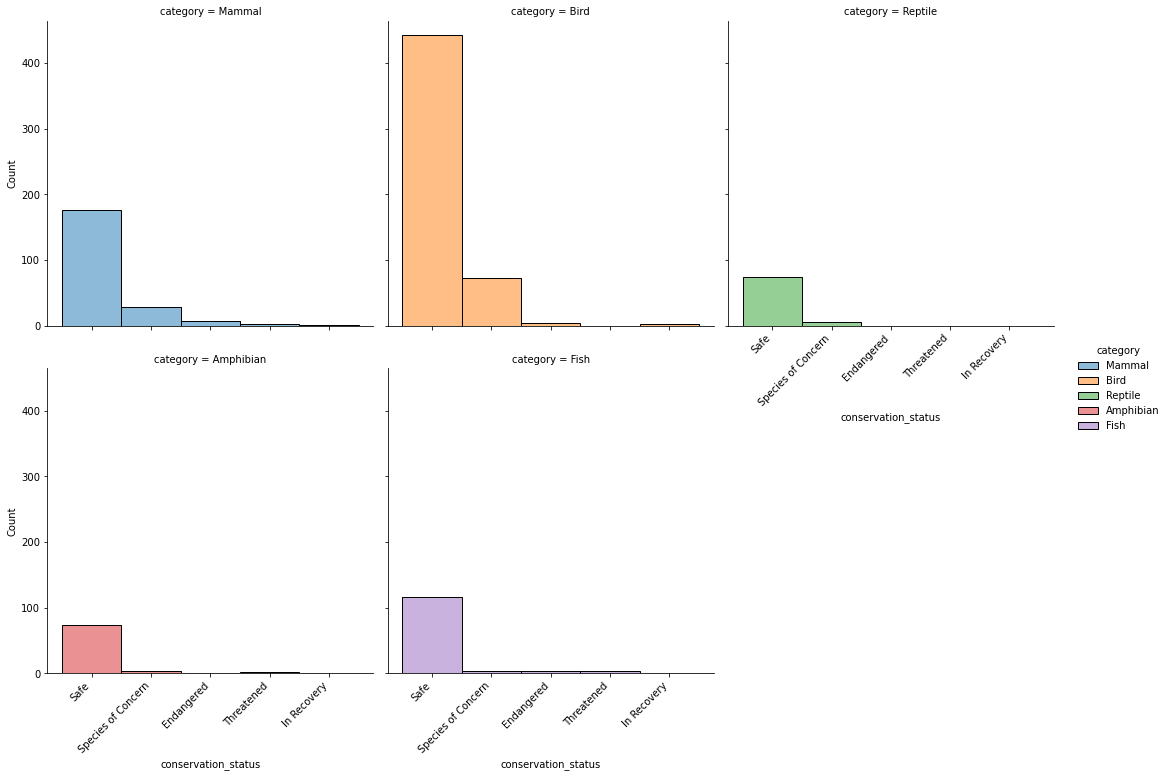

<Figure size 432x288 with 0 Axes>

In [12]:
#Conservation status for all animals
chart3 = sns.displot(data=spec_info_safe_animals, x="conservation_status")
chart3.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
plt.clf()
#conservation status split by animal
chart4 = sns.displot(data=spec_info_safe_animals, x="conservation_status", hue='category', col='category', col_wrap=3)
chart4.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
plt.clf()

This data clearly shows us that the majority of animals do not fall under a conservation status. Birds have the most amount of species of concern yet also have by far the most amount of safe species. This data makes mammals look more concerning as the amount of safe animals is not as high compared to the others in danger when comparing categories of animals. 

In [13]:
spec_info_safe_animals.groupby('conservation_status').conservation_status.count()

conservation_status
Endangered             15
In Recovery             4
Safe                  881
Species of Concern    113
Threatened              8
Name: conservation_status, dtype: int64

The numerical values for each category have been produced above for further statistical analysis. 881 animals are not part of a conservation_status comapred to 140 that are. That means that only 13% of animals have a conservation status.

# Question 2
Are certain types of species more likely to be endangered?

To answer this question, firstly the dataframe spec_info_safe, which has all the missing values filled in as safe, is given a new column called 'is_protected' which displays true for any species that had a value other than safe.

In [16]:
spec_info_safe['is_protected'] = spec_info_safe.conservation_status != 'Safe'
display(spec_info_safe)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,False
1,Mammal,Bos bison,"American Bison, Bison",Safe,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Safe,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Safe,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Safe,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Safe,False


After this is done, the dataframe is changed so that it is grouped by category of species and protected status. The scientific_name column is also changed to show the number of unique values. The dataframe is then pivoted so that the rows become the categories, the values are the number of unique values in the scientific_name column and the column names are changed to be 'category, not_protected, and protected respectively. Lastly an extra column is added to show the percentage of species that are protected by animal.

In [18]:
#reshaping the dataframe
category_counts = spec_info_safe.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected%'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100
category_counts['percent_protected%'] = round(category_counts['percent_protected%'], 2)
display(category_counts)

,category,not_protected,protected,percent_protected%
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


Based on the above table 17.05% of all mammals sighted in the national parks in the last seven days have some sort of protected conservation status. Comparing this to only 1.08% of vascular plants, it shows that certain types of species in the national parks are more likely to be endangered than others.

# Question 3
Are the differences between species and their conservation status significant? (Chi-Square)

Species and conservation status are both categorical variables so to compare them Chi-Square tests will need to be run. The test can only compare two categories of species (birds & fish) at once so it will need to be run multiple times to get every comparision. Firstly a contingency table is made like the one below and then populated with the correct data.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The table is then put into the chi2_contingency function. The p-value (second number) is the one we are concerned about as it tells us the statistical signifiance of the test. If the p-value is less than 0.05 (the standard value to test at) then the difference between those two species and their conservation status is significant.

In [19]:
from scipy.stats import chi2_contingency
# Comparing Amphibians and Birds
contingencyAB = [[7, 72,],
                [75, 413]]
chi2_contingency(contingencyAB)

(1.831621580618698,
 0.17593613249594683,
 1,
 array([[ 11.42504409,  67.57495591],
        [ 70.57495591, 417.42504409]]))

In [20]:
# Comparing Amphibians and Fish
contingencyAF = [[7, 72,],
                [11, 115]]
chi2_contingency(contingencyAF)

(0.0,
 1.0,
 1,
 array([[  6.93658537,  72.06341463],
        [ 11.06341463, 114.93658537]]))

In [21]:
# Comparing Amphibians and Mammals
contingencyAM = [[7, 72,],
                [30, 146]]
chi2_contingency(contingencyAM)

(2.321746712946015,
 0.12757669693198975,
 1,
 array([[ 11.4627451,  67.5372549],
        [ 25.5372549, 150.4627451]]))

In [22]:
# Comparing Amphibians and Nonvascular Plants
contingencyAN = [[7, 72,],
                [5, 328]]
chi2_contingency(contingencyAN)

(9.765103711306242,
 0.001778554820715609,
 1,
 array([[  2.30097087,  76.69902913],
        [  9.69902913, 323.30097087]]))

In [23]:
# Comparing Amphibians and Reptiles
contingencyAR = [[7, 72,],
                [5, 73]]
chi2_contingency(contingencyAR)

(0.07696702910310493,
 0.7814504686518953,
 1,
 array([[ 6.03821656, 72.96178344],
        [ 5.96178344, 72.03821656]]))

In [24]:
# Comparing Amphibians and Vascular Plants
contingencyAV = [[7, 72],
                [46, 4216]]
chi2_contingency(contingencyAV)

(32.7572979770742,
 1.0441355146657018e-08,
 1,
 array([[9.64524303e-01, 7.80354757e+01],
        [5.20354757e+01, 4.20996452e+03]]))

In [25]:
# Comparing Birds and Fish
contingencyBF = [[75, 413],
                [11, 115]]
chi2_contingency(contingencyBF)

(3.1338596463736463,
 0.07668199569057187,
 1,
 array([[ 68.35179153, 419.64820847],
        [ 17.64820847, 108.35179153]]))

In [26]:
# Comparing Birds and Mammals
contingencyBM = [[75, 413],
                [30, 146]]
chi2_contingency(contingencyBM)

(0.16170148316545574,
 0.6875948096661336,
 1,
 array([[ 77.1686747, 410.8313253],
        [ 27.8313253, 148.1686747]]))

In [27]:
# Comparing Birds and Nonvascular Plants
contingencyBN = [[75, 413],
                [5, 328]]
chi2_contingency(contingencyBN)

(41.717457869992714,
 1.0546306904975004e-10,
 1,
 array([[ 47.55176614, 440.44823386],
        [ 32.44823386, 300.55176614]]))

In [28]:
# Comparing Birds and Reptiles
contingencyBR = [[75, 413],
                [5, 73]]
chi2_contingency(contingencyBR)

(3.7396547786854963,
 0.05313542232154235,
 1,
 array([[ 68.97526502, 419.02473498],
        [ 11.02473498,  66.97526502]]))

In [29]:
# Comparing Birds and Vascular Plants
contingencyBV = [[75, 413],
                [46, 4216]]
chi2_contingency(contingencyBV)

(354.42332680820607,
 4.612268031690143e-79,
 1,
 array([[  12.43115789,  475.56884211],
        [ 108.56884211, 4153.43115789]]))

In [30]:
# Comparing Fish and Mammals
contingencyFM = [[11, 115],
                [30, 146]]
chi2_contingency(contingencyFM)

(3.6476510249814145,
 0.056148348448900355,
 1,
 array([[ 17.10596026, 108.89403974],
        [ 23.89403974, 152.10596026]]))

In [31]:
# Comparing Fish and Nonvascular Plants
contingencyFN = [[11, 115],
                [5, 328]]
chi2_contingency(contingencyFN)

(12.13040550073211,
 0.0004960633228752838,
 1,
 array([[  4.39215686, 121.60784314],
        [ 11.60784314, 321.39215686]]))

In [32]:
# Comparing Fish and Reptiles
contingencyFR = [[11, 115],
                [5, 73]]
chi2_contingency(contingencyFR)

(0.10955400981996731,
 0.7406524615907095,
 1,
 array([[  9.88235294, 116.11764706],
        [  6.11764706,  71.88235294]]))

In [33]:
# Comparing Fish and Vascular Plants
contingencyFV = [[11, 115],
                [46, 4216]]
chi2_contingency(contingencyFV)

(50.065682762850486,
 1.486846949188912e-12,
 1,
 array([[1.63673655e+00, 1.24363263e+02],
        [5.53632634e+01, 4.20663674e+03]]))

In [34]:
# Comparing Mammals and Nonvascular Plants
contingencyMN = [[30, 146],
                [5, 328]]
chi2_contingency(contingencyMN)

(41.0526001992972,
 1.481868915759314e-10,
 1,
 array([[ 12.1021611, 163.8978389],
        [ 22.8978389, 310.1021611]]))

In [35]:
# Comparing Mammals and Reptiles
contingencyMR = [[30, 146],
                [5, 73]]
chi2_contingency(contingencyMR)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [36]:
# Comparing Mammals and Vascular Plants
contingencyMV = [[30, 146],
                [46, 4216]]
chi2_contingency(contingencyMV)

(246.5870424874456,
 1.4405067309854046e-55,
 1,
 array([[3.01397026e+00, 1.72986030e+02],
        [7.29860297e+01, 4.18901397e+03]]))

In [37]:
# Comparing Nonvascular Plants and Reptiles
contingencyNR = [[5, 328],
                [5, 73]]
chi2_contingency(contingencyNR)

(4.513570089848144,
 0.03362698310726171,
 1,
 array([[  8.10218978, 324.89781022],
        [  1.89781022,  76.10218978]]))

In [38]:
# Comparing Nonvascular Plants and Vascular Plants
contingencyNV = [[5, 328],
                [46, 4216]]
chi2_contingency(contingencyNV)

(0.19069121233812064,
 0.6623419491381985,
 1,
 array([[3.69597388e+00, 3.29304026e+02],
        [4.73040261e+01, 4.21469597e+03]]))

In [39]:
# Comparing Reptiles and Vascular Plants
contingencyRV = [[5, 73],
                [46, 4216]]
chi2_contingency(contingencyRV)

(14.435371140033908,
 0.00014505215494675828,
 1,
 array([[9.16589862e-01, 7.70834101e+01],
        [5.00834101e+01, 4.21191659e+03]]))

The comparisions above which are statistically significant (P-value under 0.05) are:
1. Reptiles and Vascular plants
2. Nonvascular Plants and Reptiles
3. Mammals and Reptiles
4. Fish and Nonvascular Plants
5. Amphibians and Nonvascular Plants

This means that there is a significant difference between the above groups of species and their conservation statuses.

# Question 4
Which species were spotted the most at each park?

Firstly the names of the different national parks in the data are established.

In [40]:
obs.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Then the row with the most observations for each national park is produced and printed below.

In [41]:
obs_GSMNP = obs[obs.park_name == 'Great Smoky Mountains National Park']
g = obs_GSMNP.sort_values(by='observations', ascending=False)
display(g.head(1))

obs_YoNP = obs[obs.park_name == 'Yosemite National Park']
g = obs_YoNP.sort_values(by='observations', ascending=False)
display(g.head(1))

obs_BNP = obs[obs.park_name == 'Bryce National Park']
g = obs_BNP.sort_values(by='observations', ascending=False)
display(g.head(1))

obs_YeNP = obs[obs.park_name == 'Yellowstone National Park']
g = obs_YeNP.sort_values(by='observations', ascending=False)
display(g.head(1))

,scientific_name,park_name,observations
8840,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147


,scientific_name,park_name,observations
6682,Ivesia shockleyi var. shockleyi,Yosemite National Park,223


,scientific_name,park_name,observations
13138,Valerianella radiata,Bryce National Park,176


,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321


The scientific names of each species was then entered into the species_info dataframe to find the common name of the most common species sighted in the last seven days from each national park.

In [42]:
display(spec_info[spec_info.scientific_name == 'Sonchus asper ssp. asper'])
display(spec_info[spec_info.scientific_name == 'Ivesia shockleyi var. shockleyi'])
display(spec_info[spec_info.scientific_name == 'Valerianella radiata'])
display(spec_info[spec_info.scientific_name == 'Lycopodium tristachyum'])

,category,scientific_name,common_names,conservation_status
4840,Vascular Plant,Sonchus asper ssp. asper,Spiny Sowthistle,NaN


,category,scientific_name,common_names,conservation_status
5728,Vascular Plant,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",NaN


,category,scientific_name,common_names,conservation_status
1228,Vascular Plant,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",NaN


,category,scientific_name,common_names,conservation_status
1760,Vascular Plant,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",NaN


The species most spotted in the Great Smokey Mountains National Park was the 'Sonchus asper ssp. asper' or more commonly known as a Spiny Sowthistle. It had 147 observations in the last seven days.

The species most spotted in Yosemite National Park was the 'Ivesia shockleyi var. shockleyi' or more commonly known as Shockley's Ivesia or Sky Mousetail. It had 223 observations in the last seven days.

The species most spotted in the Bryce National Park was the 'Valerianella radiata' or more commonly known as Beaked Corn-Salad or Corn Salad. It had 176 observations in the last seven days.

The species most spotted in Yellowstone National Park was the 'Lycopodium tristachyum' or more commonly known as Deep-Root Clubmoss or Ground Cedar. It had 321 observations in the last seven days.

# Conclusions
This project was able to take the data provided and answer the questions posed at the start using statistical techniques and data visualizations.

What is the distribution of conservation_status for animals?
    The charts show that the vast majority of animals in the national parks are considered safe. Only 13% of animals are under a conservation status. Of the animals that are threatened, birds and mammals are most at risk.

Are certain types of species more likely to be endangered?
    Yes, the species most likely to be endangered are mammals and birds with 17% and 15% of the ones found in the parks endangered respectively. The species least likely to be endangered are nonvascular and vascular plants with 1.5% and 1% of the ones found in the parks endangered respectively.

Are the differences between species and their conservation status significant?
    The only species that when compared with each other had a statistically significant difference in their conservation status were:
1. Reptiles and Vascular plants
2. Nonvascular Plants and Reptiles
3. Mammals and Reptiles
4. Fish and Nonvascular Plants
5. Amphibians and Nonvascular Plants

Which species were spotted the most at each park?
The most common species spotted at each park were different types of vascular plants. Deep-Root Clubmoss or Ground Cedar was the most sighted across all the national parks with 321 observations in Yellowstone National Park in the last seven days.

# Further Research
The data provided only included observations from the last seven days which limits the ability to analyse changes over time. Only four national parks were included in the data and the size of these parks are not recorded. Both these factors limit diversity. It would be intresting to see more parks and the size of them included in the data.